# Юрчук М.С.
## 19-ИВТ-2
### Вариант 23 | 5 / 2, 3

# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных 

date - время в формате год-месяц-день час:минута:секунда time year-month-day

Appliances - бытовые приборы, потребление в Втч

lights - освещение,энергопотребление светильников в доме, в Втч

T1 - температура на кухне, в цельсиях

RH_1 - влажность на кухне, в процентах

T2 - температура в жилой зоне, в цельсиях

RH_2 - влажность в жилой зоне, в процентах

T3 - температура в прачечной зоне, в цельсиях

RH_3 - влажность в прачечной зоне, в процентах

T4 - температура в офисе, в цельсиях

RH_4 - влажность в офисе, в процентах

T5 - температура в ванной зоне, в цельсиях

RH_5 - влажность в ванной зоне, в процентах

T6 - температура вне здания (северная сторона), в цельсиях

RH_6 - влажность вне здания (северная сторона), в процентах

T7 - температура в гладильной комнате, в цельсиях

RH_7 - влажность в гладильной комнате, в процентах

T8 - температура в детской комнате, в цельсиях

RH_8 - влажность в детской комнате, в процентах

T9 - температура в родительской комнате, в цельсиях

RH_9 - влажность в родительской комнате, в процентах

T_out - температура снаружи (от метеостанции Chievres), в цельсиях

Press_mm_hg - давление (от метеостанции Chievres), в мм. рт

RH_out - влажность (от метеостанции Chievres), в процентах

Windspeed - скорость ветра (от метеостанции Chievres), в м/с

Visibility - видимость (от метеостанции Chievres), в км

Tdewpoint - точка росы (от метеостанции Chievres), в Â°C 

rv1 - Случайная величина 1, безразмерная

rv2 - Случайная величина 2, безразмерная

# 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sn
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold, train_test_split)
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

from scipy.stats import pearsonr, spearmanr

pd_data = pd.read_csv('energydata_complete.csv')
pd_data.drop(['date', 'rv1', 'rv2'], axis=1, inplace=True)
pd_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [2]:
print("До удаление дубликатов: %d" % len(pd_data))
pd_data.drop_duplicates(keep="first", inplace=True)
pd_data = pd_data.dropna().reset_index(drop=True)
print("После удаление дубликатов: %d \n" % len(pd_data))

До удаление дубликатов: 19735
После удаление дубликатов: 19735 



# 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования.

In [3]:
# выделим категориальные и числовые(количественные) признаки
numerical_columns = [i for i in pd_data.columns if pd_data[i].dtype.name != 'object']
categorial_columns = [i for i in pd_data.columns if pd_data[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']
categorial:  []


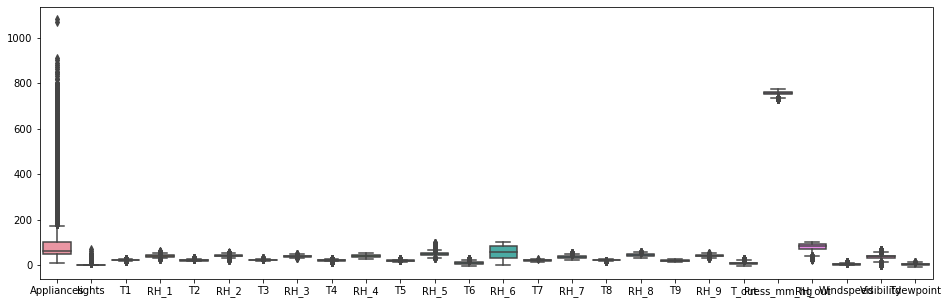

In [4]:
pt.figure(figsize=(16, 5))
sn.boxplot(data=pd_data[numerical_columns])
pt.show()

#### Способ масштабирования: нормализация

In [5]:
scaler = MinMaxScaler()
pd_data[numerical_columns] = scaler.fit_transform(pd_data[numerical_columns])

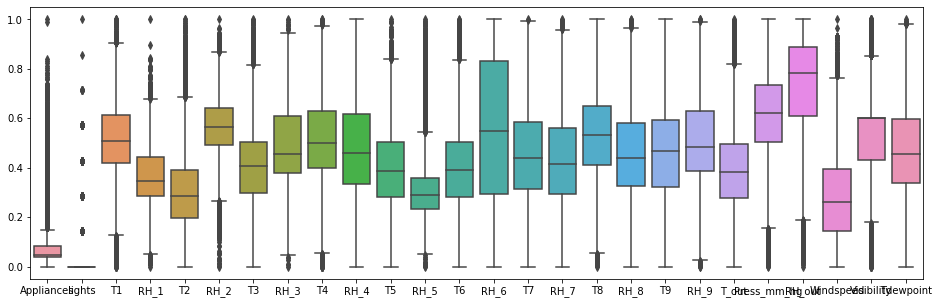

In [6]:
pt.figure(figsize=(16, 5))
sn.boxplot(data=pd_data[numerical_columns])
pt.show()

# 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

Категориальные признаки отсутствуют

# 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.

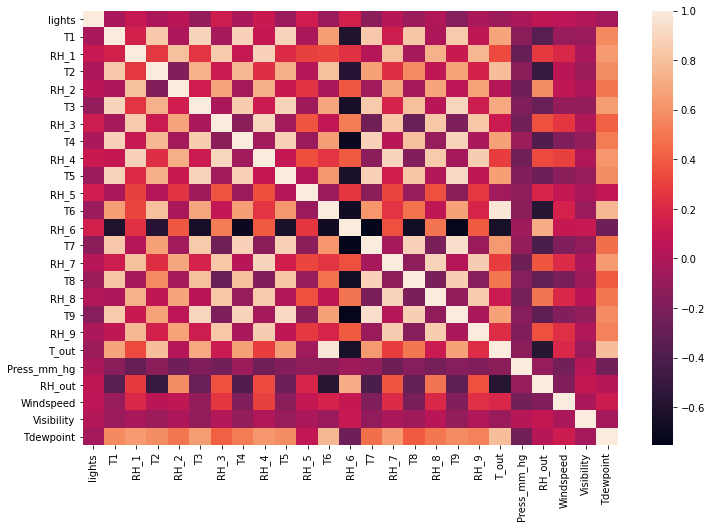

In [7]:
df_correl = pd_data.drop('Appliances', axis=1).corr()
pt.figure(figsize = (12,8))
sn.heatmap(df_correl)
pt.show()

# 6. Заполните пропущенные значения в данных;

In [8]:
pd_data.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64

Пропущенных значений нет

# 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [9]:
X, y = pd_data.drop('Appliances', axis=1), pd_data['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### LASSO регуляризатор

In [10]:
las = Lasso()
params = {'alpha': np.arange(0, 3, 0.05)}
las_grid = GridSearchCV(las, params)
las_grid.fit(X_train, y_train)
best_alpha = las_grid.best_estimator_.alpha

las = Lasso(alpha=best_alpha)
las.fit(X_train, y_train)
pred_las = las.predict(X_test)

person, pvalue_p = pearsonr(pred_las, y_test)
spearman, pvalue_s = spearmanr(pred_las, y_test)
print('pearson correlation: ', person)
print('pearson pvalue: ', pvalue_p)
print('spearmen correlation: ', spearman)
print('spearmen pvalue: ', pvalue_s)

pearson correlation:  0.40964284155122105
pearson pvalue:  2.0217717020597372e-238
spearmen correlation:  0.526328335236274
spearmen pvalue:  0.0


In [11]:
mean_squared_error(y_test, pred_las)

0.0074902629277217615

In [12]:
mean_absolute_error(y_test, pred_las)

0.049456755871352925

### RIDGE регуляризатор

In [13]:
ridge = Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
ridge_grid = GridSearchCV(ridge, params)
ridge_grid.fit(X_train, y_train)
best_alpha = ridge_grid.best_estimator_.alpha

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

person, pvalue_p = pearsonr(pred_ridge, y_test)
spearman, pvalue_s = spearmanr(pred_ridge, y_test)
print('pearson correlation: ', person)
print('pearson pvalue: ', pvalue_p)
print('spearmen correlation: ', spearman)
print('spearmen pvalue: ', pvalue_s)

pearson correlation:  0.4095429691029657
pearson pvalue:  2.7051464424873613e-238
spearmen correlation:  0.526971170105845
spearmen pvalue:  0.0


In [14]:
mean_squared_error(y_test, pred_ridge)

0.007490773346720766

In [15]:
mean_absolute_error(y_test, pred_ridge)

0.04944239270608347